<a href="https://colab.research.google.com/github/FREDRICAPPAU/FREDRICAPPAU/blob/main/HW_1_YT_Trending_Videos_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#Importing resources to use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
#OPEN a dataset
#Use library called "Pandas"
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Grad School/Classes/MSA550- Predictive Analytics M, W 3:30-4:45  (Fall24)/HW #1 YT Trending Videos Dataset/yt_data_sb.csv')


In [8]:
df.head() #will return first 5 rows of the data

,Unnamed: 0,video id,trending date,title,channel title,category id,publish time,tags,views,likes,dislikes,comment count,thumbnail link,comments disabled,ratings disabled,video error or removed,description
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22.0,2017-11-13T17:13:01.000Z,SHANtell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24.0,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783.0,97185.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",NaN,146033.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24.0,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168.0,10172.0,666.0,2146.0,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731.0,132235.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [38]:
#open dataset
import pandas as pd # Import the pandas library
df = pd.read_csv('/content/drive/MyDrive/Grad School/Classes/MSA550- Predictive Analytics M, W 3:30-4:45  (Fall24)/HW #1 YT Trending Videos Dataset/yt_data_sb.csv')


The dataset includes the following columns:

video id: Unique identifier for each video.

trending date: Date when the video was trending.
title: Video title.

channel title: Channel that uploaded the video.

category id: Numeric ID for the video's category.

publish time: Timestamp when the video was published.

tags: Tags associated with the video.

views, likes, dislikes, comment count: Engagement metrics.

thumbnail link: URL to the video’s thumbnail.

comments disabled, ratings disabled, video error or removed: Flags indicating specific conditions for each video.

description: Brief text description of the video.

Observations and Initial Cleaning Steps
The column names have inconsistent formatting, and there appears to be an unnecessary index column (Unnamed: 0).
Dates in trending date appear in an unconventional format.
Some rows contain NaN values in critical columns like views and likes.
I’ll start by renaming columns, removing duplicates, dropping irrelevant columns, and handling missing values. ​

In [63]:
#Observations and Initial Cleaning Steps
yt_data = df.drop(columns=['Unnamed: 0']) # Assign the result of df.drop to yt_data, removing 'Unnamed: 0'
yt_data.columns = yt_data.columns.str.strip().str.replace(' ', '_').str.lower() # Clean column names

 # Remove duplicate rows
yt_data = yt_data.drop_duplicates()

# Check for missing values to decide on handling them
missing_data = yt_data.isnull().sum()

# Display missing data info
missing_data


,0
video_id,1
trending_date,1
title,1
channel_title,1
category_id,1
publish_time,1
tags,1
views,576
likes,326
dislikes,1


Some columns have missing values:

views, likes, dislikes, and comment_count columns have a number of missing entries. These columns are crucial for engagement analysis.

video_id, trending_date, title, channel_title, category_id, publish_time, tags, thumbnail_link, and other columns show fewer missing values (1 rows).

I’ll remove rows with missing values in essential columns like video_id, title, and views since they’re key for our analysis. Then, I'll proceed with detecting and addressing duplicates, followed by correcting the trending_date format. ​

In [64]:
 # Remove duplicate rows
yt_data = yt_data.drop_duplicates()

In [65]:
# Drop rows with missing values in essential columns
yt_data = yt_data.dropna(subset=['video_id', 'title', 'views'])

# Remove duplicates based on the video_id, assuming one record per video for unique analysis
yt_data = yt_data.drop_duplicates(subset=['video_id', 'trending_date'])

# Convert trending_date to datetime format for consistency
yt_data['trending_date'] = pd.to_datetime(yt_data['trending_date'], format='%y.%d.%m', errors='coerce')

# Check the data types after conversion to ensure consistency
data_types = yt_data.dtypes

# Display data types to confirm changes
data_types

,0
video_id,object
trending_date,datetime64[ns]
title,object
channel_title,object
category_id,float64
publish_time,object
tags,object
views,float64
likes,float64
dislikes,float64


Data types are now consistent, with trending_date converted to datetime.

I'll continue with additional cleaning for publish_time to standardize it as a datetime field, then examine for outliers or anomalies in engagement metrics such as views, likes, and comment_count to prepare the data for analysis

In [66]:
# Convert publish_time to datetime format for consistency
yt_data['publish_time'] = pd.to_datetime(yt_data['publish_time'], errors='coerce')

# Summary statistics to identify potential anomalies or outliers in engagement metrics
engagement_summary = yt_data[['views', 'likes', 'dislikes', 'comment_count']].describe()

# Display summary statistics
engagement_summary


,views,likes,dislikes,comment_count
count,4.032500e+04,4.000600e+04,4.032500e+04,3.894300e+04
mean,2.352752e+06,8.149152e+04,3.704340e+03,8.463731e+03
std,7.343133e+06,4.212883e+05,2.916433e+04,3.788257e+04
min,-1.000000e+03,-5.000000e+02,-1.000000e+02,0.000000e+00
25%,2.418040e+05,5.398500e+03,2.020000e+02,6.120000e+02
50%,6.810890e+05,1.807700e+04,6.300000e+02,1.852000e+03
75%,1.819343e+06,5.549800e+04,1.939000e+03,5.734500e+03
max,2.252119e+08,2.167442e+07,1.674420e+06,1.361580e+06


There are some potential issues at this step:

Negative values in views, likes, and dislikes are likely errors, as engagement metrics shouldn't be negative.

Extremely high values in metrics like likes and dislikes might represent valid high-engagement videos but could also be outliers.

correcting negative values by setting them to zero will identify potential outliers by setting thresholds based on interquartile ranges


In [67]:
# Set negative values in 'views', 'likes', 'dislikes' to zero as they are likely data entry errors
yt_data['views'] = yt_data['views'].apply(lambda x: max(x, 0))
yt_data['likes'] = yt_data['likes'].apply(lambda x: max(x, 0))
yt_data['dislikes'] = yt_data['dislikes'].apply(lambda x: max(x, 0))

# Display the cleaned summary statistics to verify changes
cleaned_engagement_summary = yt_data[['views', 'likes', 'dislikes', 'comment_count']].describe()
cleaned_engagement_summary


,views,likes,dislikes,comment_count
count,4.032500e+04,4.000600e+04,4.032500e+04,3.894300e+04
mean,2.352752e+06,8.149153e+04,3.704343e+03,8.463731e+03
std,7.343133e+06,4.212883e+05,2.916433e+04,3.788257e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.418040e+05,5.398500e+03,2.020000e+02,6.120000e+02
50%,6.810890e+05,1.807700e+04,6.300000e+02,1.852000e+03
75%,1.819343e+06,5.549800e+04,1.939000e+03,5.734500e+03
max,2.252119e+08,2.167442e+07,1.674420e+06,1.361580e+06


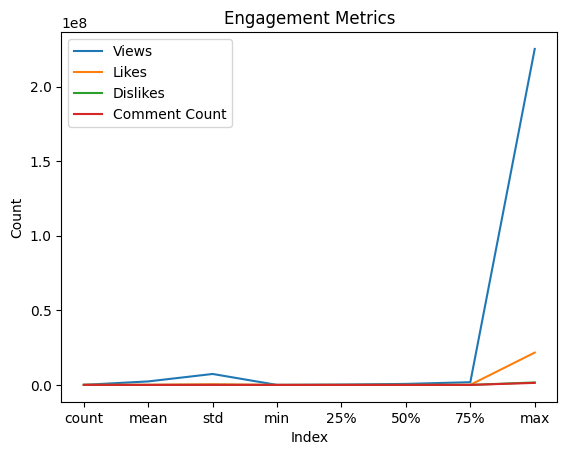

In [68]:
# Data is now cleaned and ready for exploring the data analysis (EDA).
# We'll focus on trends in views, likes, and other metrics for engagement.
# We'll examine categories of trending videos.
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data
ax.plot(cleaned_engagement_summary.index, cleaned_engagement_summary['views'], label='Views')
ax.plot(cleaned_engagement_summary.index, cleaned_engagement_summary['likes'], label='Likes')
ax.plot(cleaned_engagement_summary.index, cleaned_engagement_summary['dislikes'], label='Dislikes')
ax.plot(cleaned_engagement_summary.index, cleaned_engagement_summary['comment_count'], label='Comment Count')

# Add labels and title
ax.set_xlabel('Index')  # Or specify a more descriptive x-axis label
ax.set_ylabel('Count')
ax.set_title('Engagement Metrics')

# Add a legend
ax.legend()

# Display the plot
plt.show()


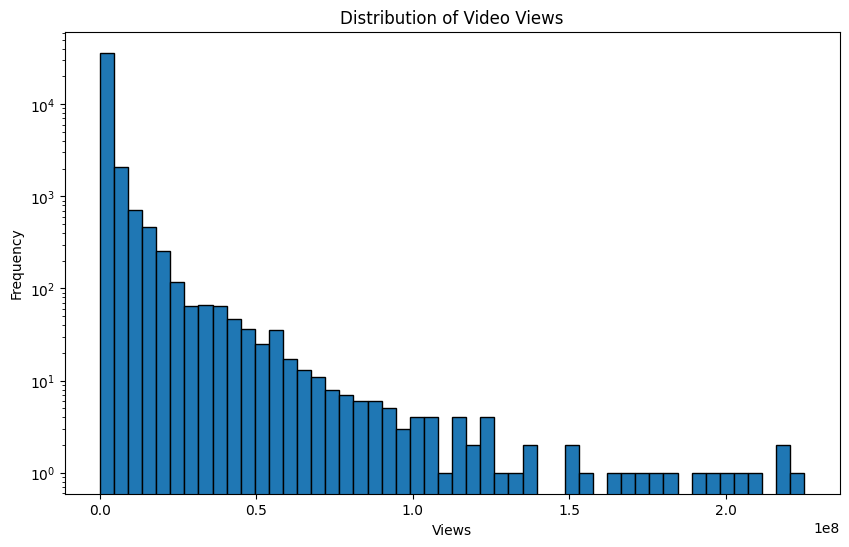

In [70]:
import matplotlib.pyplot as plt

# Visualizing the distribution of views
plt.figure(figsize=(10, 6))
plt.hist(yt_data['views'], bins=50, edgecolor='black')
plt.title('Distribution of Video Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale to better observe the distribution
plt.show()

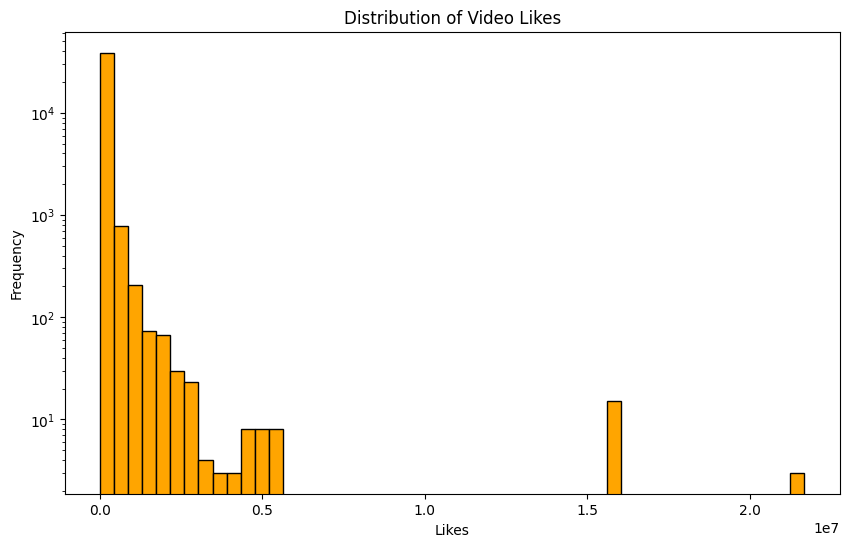

In [79]:
# Visualizing the distribution of likes
plt.figure(figsize=(10, 6))
plt.hist(yt_data['likes'], bins=50, edgecolor='black', color='orange')
plt.title('Distribution of Video Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()


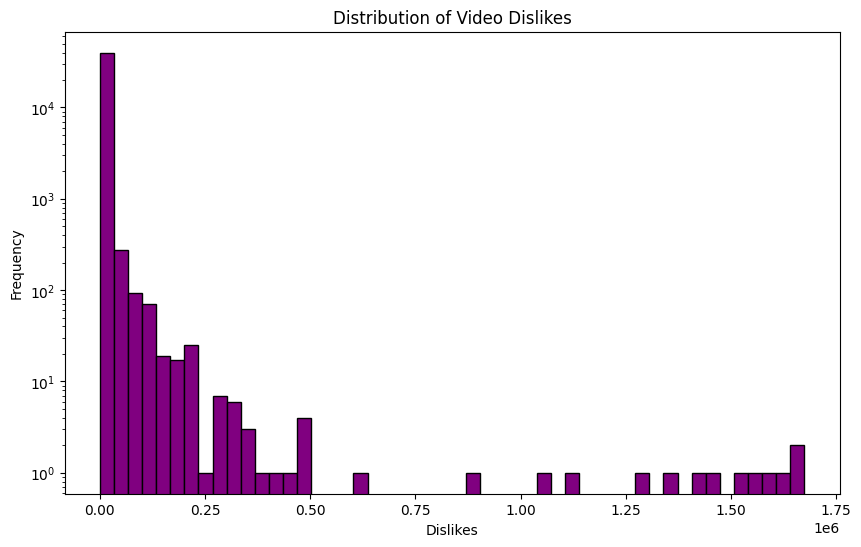

In [83]:
#Visualizing the distribution of dislikes
plt.figure(figsize=(10, 6))
plt.hist(yt_data['dislikes'], bins=50, edgecolor='black', color='purple')
plt.title('Distribution of Video Dislikes')
plt.xlabel('Dislikes')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

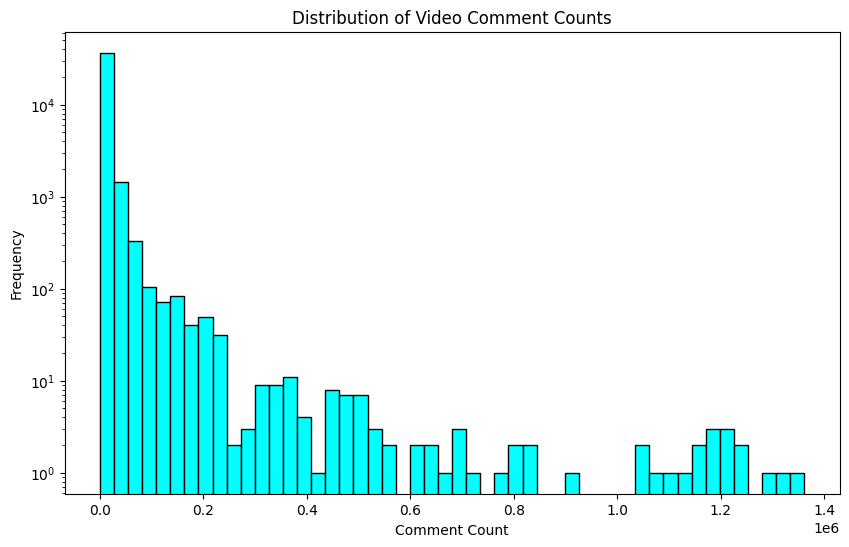

In [84]:
# Visualizing the distribution of comments
plt.figure(figsize=(10, 6))
plt.hist(yt_data['comment_count'].dropna(), bins=50, edgecolor='black', color='cyan')
plt.title('Distribution of Video Comment Counts')
plt.xlabel('Comment Count')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

The histograms reveal unique patterns in video engagement metrics:

Views: Most trending videos have under 10 million views, though there are some highly popular videos with significantly more.

Likes and Dislikes: Both metrics show similar patterns, where the majority are relatively low, with a few exceptionally high values.

Comment Count: This follows a similar trend to views, with many videos having fewer comments but a few outliers with a high count.

We'll now  investigate category-based trends to understand which video types tend to trend most often.

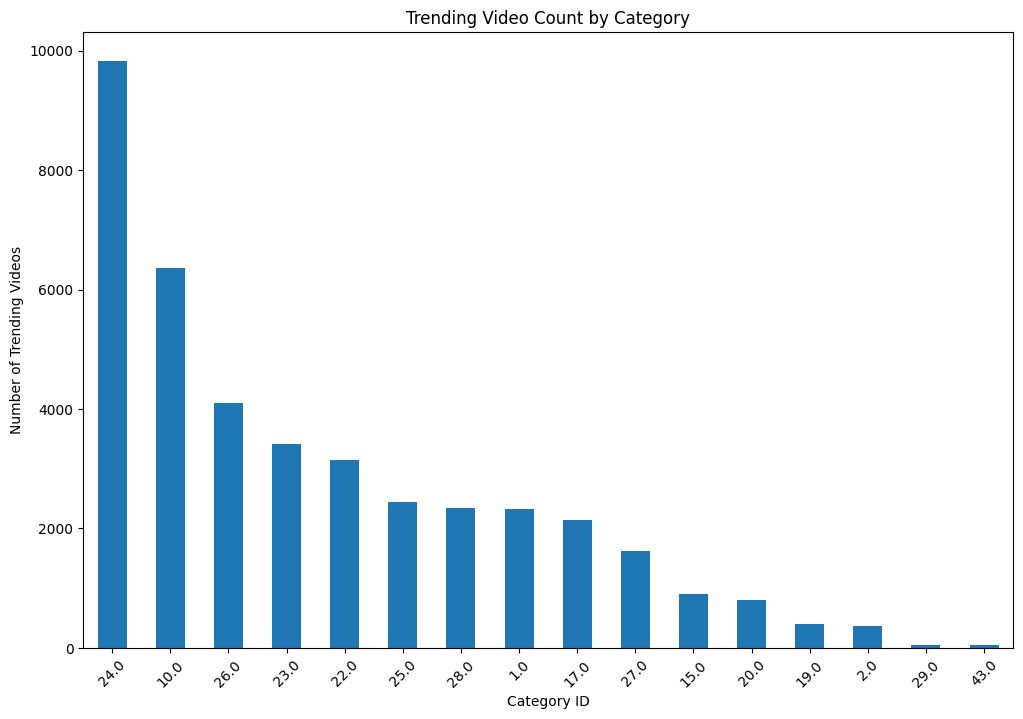

In [85]:
# Count the frequency of each category to identify which ones trend the most
category_counts = yt_data['category_id'].value_counts()

# Plotting the trending video count by category
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar')
plt.title('Trending Video Count by Category')
plt.xlabel('Category ID')
plt.ylabel('Number of Trending Videos')
plt.xticks(rotation=45)
plt.show()

The bar chart shows that certain categories (e.g., 24, 10, 17, etc.) have a higher frequency of trending videos, indicating these types are more likely to trend on YouTube.

We'll now I’ll analyze how publish time affects video popularity, which might reveal patterns like the best times for videos to gain traction

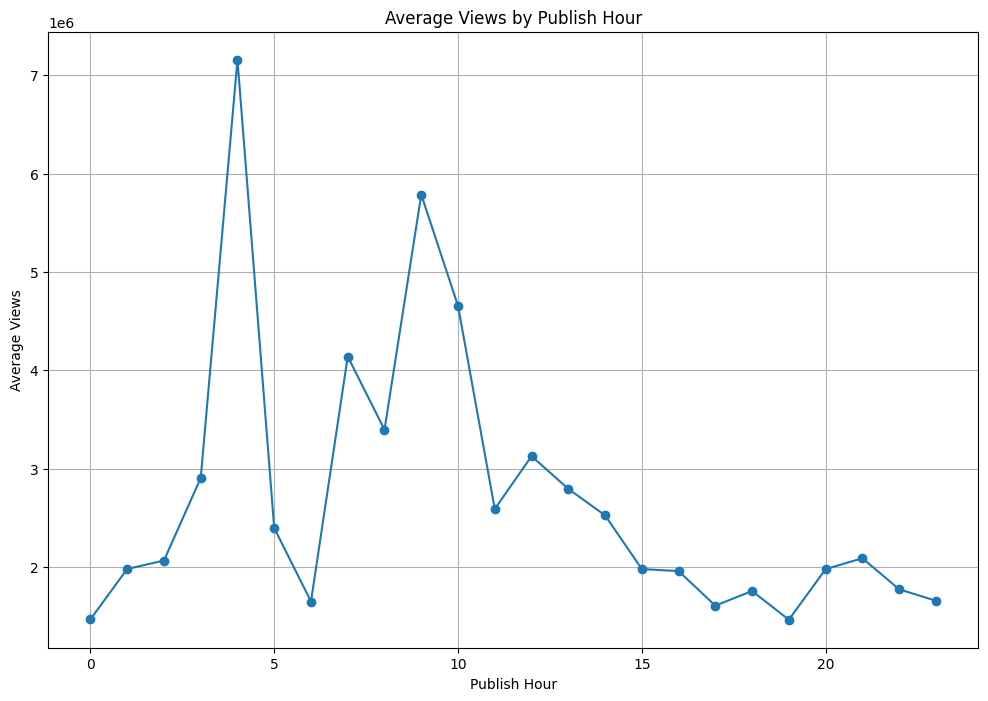

In [86]:
# Extracting the hour from the publish time to analyze trends based on publish hour
yt_data['publish_hour'] = yt_data['publish_time'].dt.hour

# Aggregating the average views by publish hour
hourly_views = yt_data.groupby('publish_hour')['views'].mean()

# Plotting average views by publish hour
plt.figure(figsize=(12, 8))
hourly_views.plot(kind='line', marker='o')
plt.title('Average Views by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Average Views')
plt.grid(True)
plt.show()


The line chart indicates a highly noticeable trend in views based on the publish hour. Videos published during certain hours seem to gain more views on average, suggesting potential optimal posting times for higher engagement.

Based on these results the dataset shows clear trends in popular video types, engagement distributions, and timing patterns, all contributing factors to viral success on YouTube.

In [87]:
#W# Convert trending_date and publish_time to datetime format
yt_data['trending_date'] = pd.to_datetime(yt_data['trending_date'], format='%y.%d.%m', errors='coerce')
yt_data['publish_time'] = pd.to_datetime(yt_data['publish_time'], errors='coerce')



In [24]:
# Encoding categorical data
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np # Import numpy

# Assuming 'yt_data' is your DataFrame and you want to encode the 4th column (index 3)
X = yt_data.iloc[:, [3]].values # Extract the 4th column from your DataFrame 'yt_data' and assign it to X

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough') # Since X now contains only one column, change the index in transformers to 0
X = np.array(ct.fit_transform(X))